<a href="https://colab.research.google.com/github/rburakkorkmaz/CSE-406_Scientific-Programming/blob/main/Korkmaz_RamazanBurak_E5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>Exercise 5</strong></h1>
<h1><strong>Student Name & Surname:</strong> Ramazan Burak Korkmaz</h1>
<h1><strong>Student ID:</strong> 202151056004</h1>

<h2>Needed packages</h2>

In [140]:
import numpy as np
import random
from scipy.optimize import least_squares, fmin
from scipy.spatial.distance import cdist
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import pandas as pd
import math

<h1><strong>Exercise 9.5:</strong> Singular values</h1>
Generate an nxn matrix, denoted by C, where each entry is 1 with probability p and 0 otherwise. Use the linear algebra library of Scipy to compute the singular values of C. What can you say about the relationship between n, p and the largest singular value?



<h2> Largest singular value of a matrix C is almost same with n x p. </h2>

In [167]:
# For loop to simulate different sizes
for n in range(10, 110, 20):
  # For loop to simulate different p probability
  for i in range(0, 11, 1):
    # Create C matrix with current n and p values.
    C = np.random.binomial(n=1, p=i/10, size=(n, n))
    # Scipy library svd function to find singular values of matrix C
    U, s, Vh = np.linalg.svd(C)
    # Print p, n and s values to compare
    print(f"p = {i/10}")
    print(f"n = {n}")
    print(f"s = {s[0]}")
    print("-----------------------------------------------------------------------------")

p = 0.0
n = 10
s = 0.0
-----------------------------------------------------------------------------
p = 0.1
n = 10
s = 1.98288972274762
-----------------------------------------------------------------------------
p = 0.2
n = 10
s = 2.562445587377251
-----------------------------------------------------------------------------
p = 0.3
n = 10
s = 4.221100383408113
-----------------------------------------------------------------------------
p = 0.4
n = 10
s = 4.286211287511008
-----------------------------------------------------------------------------
p = 0.5
n = 10
s = 4.557974185467321
-----------------------------------------------------------------------------
p = 0.6
n = 10
s = 6.266669394733329
-----------------------------------------------------------------------------
p = 0.7
n = 10
s = 6.334862734947987
-----------------------------------------------------------------------------
p = 0.8
n = 10
s = 8.20326036621384
-----------------------------------------------------------

<h1><strong>Exercise 10.1:</strong> Least squares</h1>
Generate matrix A ∈ Rᵐ×ⁿ with m > n.  Also generate some vector b ∈ Rᵐ.

Now find x = arg minₓ /Ax − b/₂.

Print the norm of the residual.




In [59]:
# Dimensions of the matrix
m = 50
n = 40

In [60]:
# Creating A and b matrices.
# Values of these matrices are between -100 and 100
A = np.random.randint(-100, 100, size = (m, n))
b = np.random.randint(-100, 100, size = m)

print(A)
print(b)

[[-48 -81  67 ... -38 -77 -31]
 [-92 -32  80 ...  56 -23 -37]
 [-15 -33 -44 ... -52  78  29]
 ...
 [-67 -84 -41 ... -57  16 -23]
 [  3  64  71 ... -33  24   6]
 [-23 -75  81 ...  28 -94  13]]
[-52  99   5   4  90 -39  80 -78  91  49 -33 -97  46 -13 -40  80   1 -52
  31  50   5  73  95  14 -65  81  57  96   8 -40  -1  22  31 -42 -48 -59
 -87 -32  20  39  82 -82 -23  63 -64  16  44  63   9   3]


In [61]:
# A function that returns result of Ax-b equation
def fun(x):
  return A@x - b

In [62]:
# Create a initial x matrix to start with
x = np.random.randint(-100, 100, size = n)

# Calculate residuals by scipy least_squares function
res = least_squares(fun, x)

print(res.optimality)

2.319211489520967e-11


<h1><strong>Exercise 10.2:</strong> Optimization</h1>
Find the maximum of the function

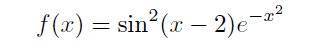





In [63]:
# Negative of the given function. Negative because we are trying to find maximum
# value of the function, therefore we get the negative of the function and 
# try to find min value instead.
def negative_f(x):
  return -1 * (math.sin(x -2) ** 2) * math.exp(-1 * (x ** 2))

In [64]:
max_x = fmin(negative_f, 0)
print(max_x)

Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40


<h1><strong>Exercise 10.3:</strong> Pairwise distances</h1>
Let X  be a matrix with n rows and m columns.  How can you compute the pairwise distances between every two rows?

As  an  example  application,  consider  n cities,  and  we  are  given  their  coordinates  in two  columns.  Now we want a nice table that tells us for each two cities, how far they are apart.

Again, make sure you make use of Scipy’s functionality instead of writing your own routine.






In [65]:
# Creating a X matrix that has values between -100 and 100 with size of (n, m)
X = np.random.randint(-100, 100, size = (n, m))

In [67]:
# Print X matrix we just created
print(X)

[[ 69  80  13 ...  13  84  22]
 [  9 -76  37 ... -97   5  18]
 [ 72  29  57 ...  49  67  24]
 ...
 [-46  93 -15 ... -93 -42  63]
 [ 58  11 -77 ...  65  99 -69]
 [ 48  -2 -58 ... -22   1 -39]]


In [66]:
# Calculate distance of two rows pair
dm = cdist(X, X, 'euclidean')

In [68]:
# Print raw array of distances
print(dm)

[[  0.         566.58450385 501.27138358 ... 631.17509457 541.52469934
  493.77727773]
 [566.58450385   0.         636.71108048 ... 566.44858549 534.3154499
  608.80210249]
 [501.27138358 636.71108048   0.         ... 611.42701936 618.31221887
  589.42599196]
 ...
 [631.17509457 566.44858549 611.42701936 ...   0.         648.60080173
  568.49098498]
 [541.52469934 534.3154499  618.31221887 ... 648.60080173   0.
  584.94358702]
 [493.77727773 608.80210249 589.42599196 ... 568.49098498 584.94358702
    0.        ]]


In [74]:
# Table view with pandas Dataframe
pd.set_option('display.width', dm.shape[0] * dm.shape[1])
print(pd.DataFrame(dm))

            0           1           2           3           4           5           6           7           8           9           10          11          12          13          14          15          16          17          18          19          20          21          22          23          24          25          26          27          28          29          30          31          32          33          34          35          36          37          38          39
0     0.000000  566.584504  501.271384  581.234892  555.638372  646.238346  561.771306  549.173015  543.960477  661.672124  572.076918  496.049393  600.979201  594.577161  586.235448  503.281234  640.363178  532.098675  620.373275  580.127572  596.060400  624.209100  569.069416  578.925729  508.220425  522.451912  584.923072  620.222541  497.730851  562.544220  540.964879  664.026355  494.732251  534.518475  471.750994  574.019163  570.157873  631.175095  541.524699  493.777278
1   566.584504    0.000000  636.71

<h1><strong>Exercise 11.1:</strong> Plotting a function</h1>

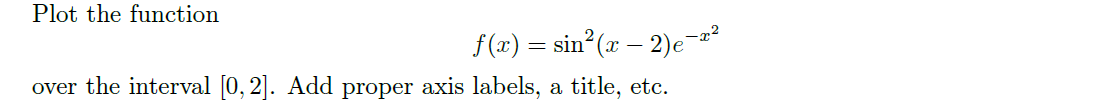







In [88]:
# Creating a function to return result of the function above
def func_body(x):
  return (math.sin(x -2) ** 2) * math.exp(-1 * (x ** 2))

In [90]:
# We vectorize the func_body so we can use it in plot function.
# Otherwise we get error
f = np.vectorize(func_body)

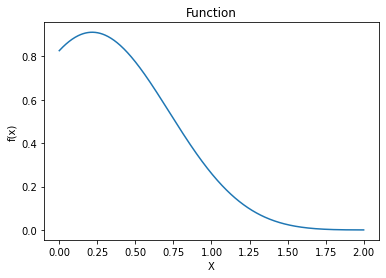

In [93]:
# Creating a equally spaced X axis vector, so we can
# plot our function
x_axis = np.linspace(0, 2, 500)

# Plot
plt.plot(x_axis, f(x_axis))
plt.title("Function")
plt.xlabel("X")
plt.ylabel("f(x)")

plt.show()

<h1><strong>Exercise 11.3:</strong> Histogram and density estimation</h1>
Generate a vector z of 10000 observations from your favorite exotic distribution. Then make a plot that
shows a histogram of z (with 25 bins), along with an estimate for the density, using a Gaussian kernel
density estimator (see scipy.stats). See Figure 2 for an example plot.






In [158]:
# Creating a Gaussian Distrubition
mu, sigma = 0.8, 0.15
s = np.random.normal(mu, sigma, 10000)

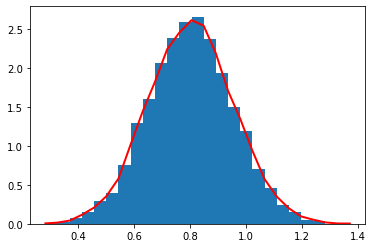

In [166]:
# Plot histogram
count, bins, ignored = plt.hist(s, 25, density=True)

# Creating a density function with gaussian kernel distrubition estimator func.
density = gaussian_kde(s)

# Plot density function over histogram
plt.plot(bins, density(bins), linewidth=2, color='r')

# Show plot
plt.show()